
<img src="https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/header.png" alt="drawing"/>


A multi-channel electroencephalography (EEG) system enables a broad range of applications including neurotherapy, biofeedback, and brain computer interfacing. The dataset you will analyse is created with the [Emotiv EPOC+](https://www.emotiv.com/product/emotiv-epoc-14-channel-mobile-eeg).  

It has 14 EEG channels with names based on the International 10-20 locations: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4:

<br/>
<br/>
<center>
<img src="https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/EEG.png" alt="drawing" width="200"/>
<center/>
<br/>
<br/>


All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. 

The experiment was conducted on one person only. The duration of the measurement was around 117 seconds.

From the paper:

> *The experiment was carried out in a quiet room. During
the experiment, the proband was being videotaped. To prevent
artifacts, the proband was not aware of the exact start time
of the measurement. Instead, he was told to sit relaxed, look
straight to the camera, and change the eye state at free will.
Only additional constraint was that, accumulated over the
entire session, the duration of both eye states should be about
the same and that the individual intervals should vary greatly
in length (from eye blinking to longer stretches)...*

The eye state was detected via a camera during the EEG measurement and later added manually to the file after analyzing the video frames. 

A label '1' indicates the eye-closed and '0' the eye-open state.

(*Source: Oliver Roesler, Stuttgart, Germany*)

First I will load the train and test set as well as modules I will be using to visualize the data. 

In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")

testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


First, the data set is printed to look at the different features present in the datasets

In [0]:
print(trainset.head())
print(testset.head())

       AF3       F7       F3      FC5  ...       F4       F8      AF4  label
0  4299.49  3997.44  4277.95  4116.92  ...  4278.97  4600.00  4369.23      1
1  4302.05  3985.64  4261.03  4129.74  ...  4283.08  4607.18  4358.46      0
2  4321.03  4015.90  4265.13  4122.56  ...  4286.15  4608.21  4371.79      0
3  4408.21  4104.10  4380.00  4232.31  ...  4388.21  4715.90  4464.10      0
4  4347.18  3975.38  4266.67  4102.56  ...  4313.33  4664.10  4411.79      1

[5 rows x 15 columns]
       AF3       F7       F3      FC5  ...       F4       F8      AF4  index
0  4296.41  4040.51  4253.33  4124.10  ...  4268.72  4598.46  4342.56      0
1  4291.28  3994.36  4247.18  4102.56  ...  4260.51  4593.33  4337.95      1
2  4299.49  4019.49  4269.74  4116.41  ...  4280.51  4596.92  4350.26      2
3  4280.00  4004.62  4263.59  4120.51  ...  4271.79  4608.72  4344.10      3
4  4317.44  3968.72  4260.51  4101.54  ...  4282.05  4592.31  4372.82      4

[5 rows x 15 columns]


In [0]:
print(trainset[trainset.label == 1].label.count())
print(trainset[trainset.label == 0].label.count())

901
1099


There are 901 timepoints captured where the subjects eyes were closes (label 1) and 1099 timepoints where the subjects eyes were open (label2)

The label column from the trainset and the index column from the testset should be removed. The Label column of the training set should be saved in a variable 


In [0]:
train_label = trainset.pop('label')
testset.pop('index')
print(trainset.head())
print(testset.head())

       AF3       F7       F3      FC5  ...      FC6       F4       F8      AF4
0  4299.49  3997.44  4277.95  4116.92  ...  4211.79  4278.97  4600.00  4369.23
1  4302.05  3985.64  4261.03  4129.74  ...  4195.90  4283.08  4607.18  4358.46
2  4321.03  4015.90  4265.13  4122.56  ...  4155.38  4286.15  4608.21  4371.79
3  4408.21  4104.10  4380.00  4232.31  ...  4319.49  4388.21  4715.90  4464.10
4  4347.18  3975.38  4266.67  4102.56  ...  4248.21  4313.33  4664.10  4411.79

[5 rows x 14 columns]
       AF3       F7       F3      FC5  ...      FC6       F4       F8      AF4
0  4296.41  4040.51  4253.33  4124.10  ...  4197.44  4268.72  4598.46  4342.56
1  4291.28  3994.36  4247.18  4102.56  ...  4190.77  4260.51  4593.33  4337.95
2  4299.49  4019.49  4269.74  4116.41  ...  4202.56  4280.51  4596.92  4350.26
3  4280.00  4004.62  4263.59  4120.51  ...  4192.82  4271.79  4608.72  4344.10
4  4317.44  3968.72  4260.51  4101.54  ...  4199.49  4282.05  4592.31  4372.82

[5 rows x 14 columns]


Now in both the train and testset the only columns that are present are features. 



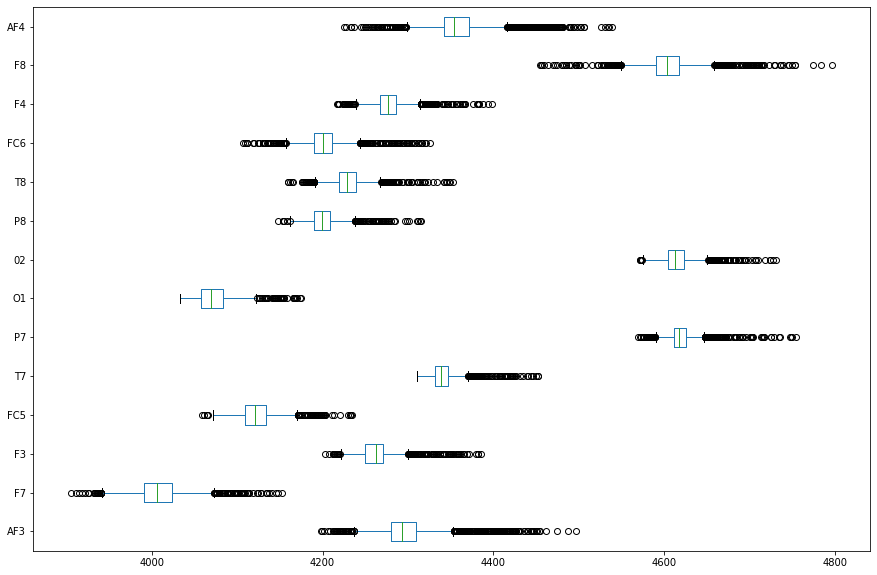

In [0]:

plt.figure(figsize = (15,10))
trainset.boxplot(vert = False, grid = False , )

The data is not centered around 0 , the next step is to center the data around 0.
all features need to have the same scale

Standardization (or **Z-score normalization**) scales the features such that they'll have the properties of a standard normal distribution ($\mu = 0$ and $\sigma = 1$):

\begin{equation} x_{norm} = \frac{x - \mu}{\sigma}.\end{equation} 

Standardizing the features is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms.

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(trainset)

trainset_scaled = scaler.transform(trainset)

testset_scaled = scaler.transform(testset)


trainset_scaled = pd.DataFrame(trainset_scaled ,columns= trainset.columns )
testset_scaled = pd.DataFrame(testset_scaled ,columns= testset.columns )




In [0]:
print(trainset_scaled.head())
print(testset_scaled.head())

        AF3        F7        F3  ...        F4        F8       AF4
0 -0.018351 -0.396476  0.677912  ...  0.026714 -0.156365  0.252992
1  0.052070 -0.791842 -0.136210  ...  0.235973  0.060820 -0.037576
2  0.574178  0.222036  0.061066  ...  0.392280  0.091976  0.322059
3  2.972354  3.177226  5.588146  ...  5.588622  3.349453  2.812530
4  1.293521 -1.135609  0.135164  ...  1.776139  1.782573  1.401236

[5 rows x 14 columns]
        AF3        F7        F3  ...        F4        F8       AF4
0 -0.103077  1.046608 -0.506702  ... -0.495161 -0.202948 -0.466549
1 -0.244195 -0.499673 -0.802616  ... -0.913170 -0.358124 -0.590924
2 -0.018351  0.342321  0.282880  ...  0.105122 -0.249531 -0.258808
3 -0.554489 -0.155906 -0.013033  ... -0.338853  0.107403 -0.425001
4  0.475423 -1.358756 -0.161230  ...  0.183531 -0.388978  0.349848

[5 rows x 14 columns]


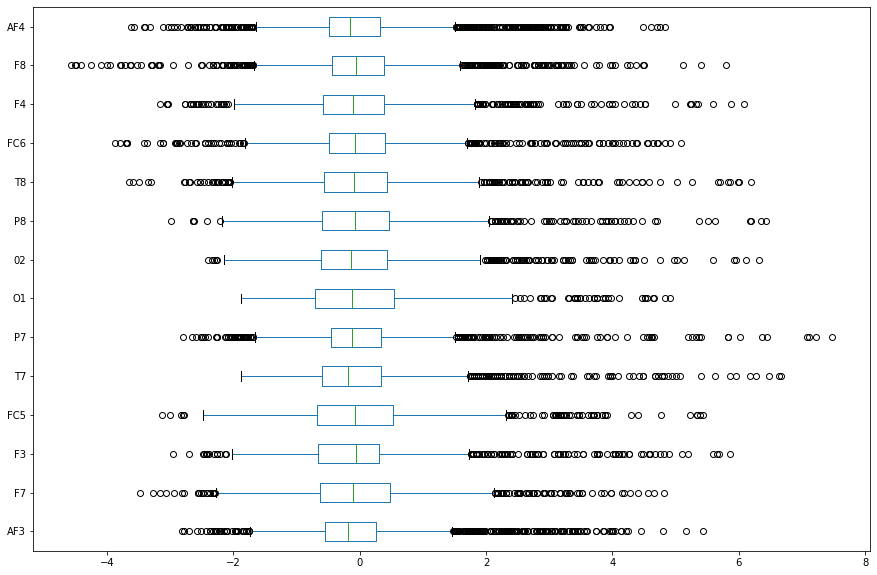

In [0]:
plt.figure(figsize = (15,10))
trainset_scaled.boxplot(vert = False, grid = False )

this data set requires a classification model since it is a classification task. 

The first model that is used is a support vector machine

Here the SVM model is tested on the training data. Cross validation is used to split the data in parts, in this case cv is set to 10 which means the data gets split in 10 equal parts. One of these parts is used as test set and the others as training sets, afterwards the AUC score is calculated. This is repeated until every parts has been the test set, at this point the mean of all the auc scores is printed.

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

x = trainset_scaled.copy()

model = SVC()

scores = cross_val_score(model , x , train_label , cv = 10 , scoring= 'roc_auc').mean()

print(scores)

0.8942757252940738


0.89 is not a bad result but this could be improved by tuning some parameters.

This is done through the GridSearch module, all the values for the parameters in 'search_space' are tested with through cross validation. Gridsearch finds the combination of values for these parameters thats results in the best score.
In the code below C = 100 and kernel = 'rbf' is the best combination.

In [0]:
from sklearn.model_selection import GridSearchCV

search_space = {'C':[0.001,0.01,0.1,1,10,100] , 'kernel':['linear','poly','rbf','sigmoid']}

model = SVC() 

grid_search = GridSearchCV(model, param_grid = search_space)

grid_search.fit(trainset, train_label)

print(grid_search.best_estimator_)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


When the AUC score is calculated again through cross validation with these optimal parameters, a much better result of 0.96 is obtained

In [0]:
x = trainset_scaled.copy()

model = SVC(C = 100 , kernel= 'rbf')

scores = cross_val_score(model , x , train_label , cv = 10 , scoring= 'roc_auc').mean()

print(scores)

0.9605496725496728


Now predictions about the testset can be made with this SVM model.

probability has to be set to true inother to use the predict_proba function.
First, the model is fitted to the training set using the training label. next, Predictions are made for the testset. 

In [0]:
model = SVC(kernel = 'rbf', C = 100, probability= True)

model.fit(trainset_scaled,train_label)

predictions = model.predict_proba(testset_scaled)

predictions

array([[9.99988612e-01, 1.13879371e-05],
       [2.50309975e-01, 7.49690025e-01],
       [9.94195761e-01, 5.80423876e-03],
       ...,
       [5.93262536e-03, 9.94067375e-01],
       [3.05217961e-01, 6.94782039e-01],
       [9.64990082e-01, 3.50099177e-02]])

Now the predictions are added to a new dataframe.
Note that only the second column of the predictions are added to this dataframe.

In [0]:
my_prediction_results = pd.DataFrame({'index': testset.index , 'label': predictions[:,1]})
my_prediction_results

,index,label
0,0,0.000011
1,1,0.749690
2,2,0.005804
3,3,0.999985
4,4,1.000000
...,...,...
12887,12887,0.094296
12888,12888,0.999988
12889,12889,0.994067
12890,12890,0.694782


Finally, the predictions dataframe is saved to a CSV file, which can now be submitted to the competition.

In [0]:
filename = "my_prediction_results.csv"

my_prediction_results.to_csv(filename , index= False)

These predictions resulted in a score of 0.96237 in the competition.

The second model that is used is a randomforest.

In [0]:
from sklearn.ensemble import RandomForestClassifier

x = trainset_scaled.copy()

model = RandomForestClassifier()

scores = cross_val_score(model , x , train_label , cv = 10 , scoring= 'roc_auc').mean()

print(scores)

0.9258658996457161


Just like with the SVM model parameters will be optimized for this model using the GridSearch module.


In [0]:
x = trainset_scaled.copy()

search_space = {'max_depth':[1,3,5,10,15,20,30,50], 'n_estimators':[10,20,50,100,200]}

model = RandomForestClassifier()

grid_search = GridSearchCV(model, param_grid=search_space)

grid_search.fit(x,train_label)

print(grid_search.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


This optimization did not result in an increase of the AUC score 

In [0]:
x = trainset_scaled.copy()

model = RandomForestClassifier(n_estimators=200 , max_depth= 15,)

scores = cross_val_score(model , x , train_label , cv = 10 , scoring= 'roc_auc').mean()

print(scores)

0.9262604968935244


Now predictions will be made for the test set with this model.

In [0]:
model = RandomForestClassifier(n_estimators=200 , max_depth= 15,)

model.fit(trainset_scaled,train_label)

predictions = model.predict_proba(testset_scaled)

predictions

array([[0.90101401, 0.09898599],
       [0.69303529, 0.30696471],
       [0.87248196, 0.12751804],
       ...,
       [0.11029437, 0.88970563],
       [0.21358077, 0.78641923],
       [0.7861879 , 0.2138121 ]])

The predictions are added into a new dataframe.

In [0]:
my_prediction_results2 = pd.DataFrame({'index': testset.index , 'label': predictions[:,1]})
my_prediction_results2

,index,label
0,0,0.098986
1,1,0.306965
2,2,0.127518
3,3,0.928079
4,4,0.850928
...,...,...
12887,12887,0.608202
12888,12888,0.704534
12889,12889,0.889706
12890,12890,0.786419


Finally, the predictions dataframe is saved to a CSV file, which can now be submitted to the competition.

In [0]:
filename = "my_prediction_results.csv"

my_prediction_results2.to_csv(filename , index= False)

These predictions resulted in a score of 0.92087 in the competition.

Now the predictions of both models are compared.

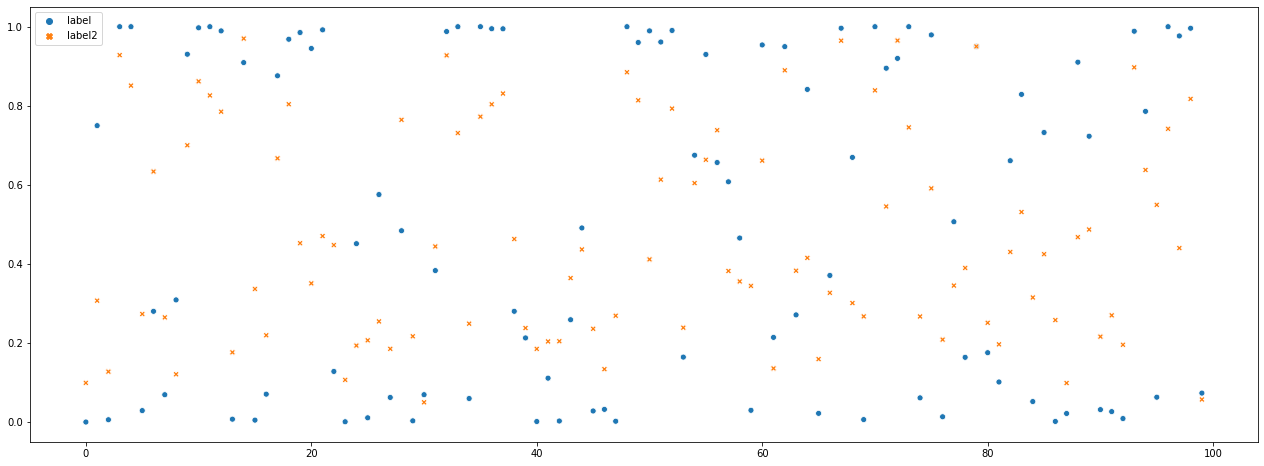

In [0]:
my_prediction_results['label2'] = my_prediction_results2['label']
my_prediction_results.pop('index')

plt.figure(figsize=(22,8))
sns.scatterplot(data = my_prediction_results.iloc[:100,])
plt.show()

